In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

In [2]:
df = pd.read_csv(r"C:\Users\Zain Khalid\Desktop\Kidney.csv") 
pd. set_option('display.max_columns', 30)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [7]:
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

In [8]:
df[['pcv', 'wc', 'rc']].dtypes

pcv    float64
wc     float64
rc     float64
dtype: object

In [9]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

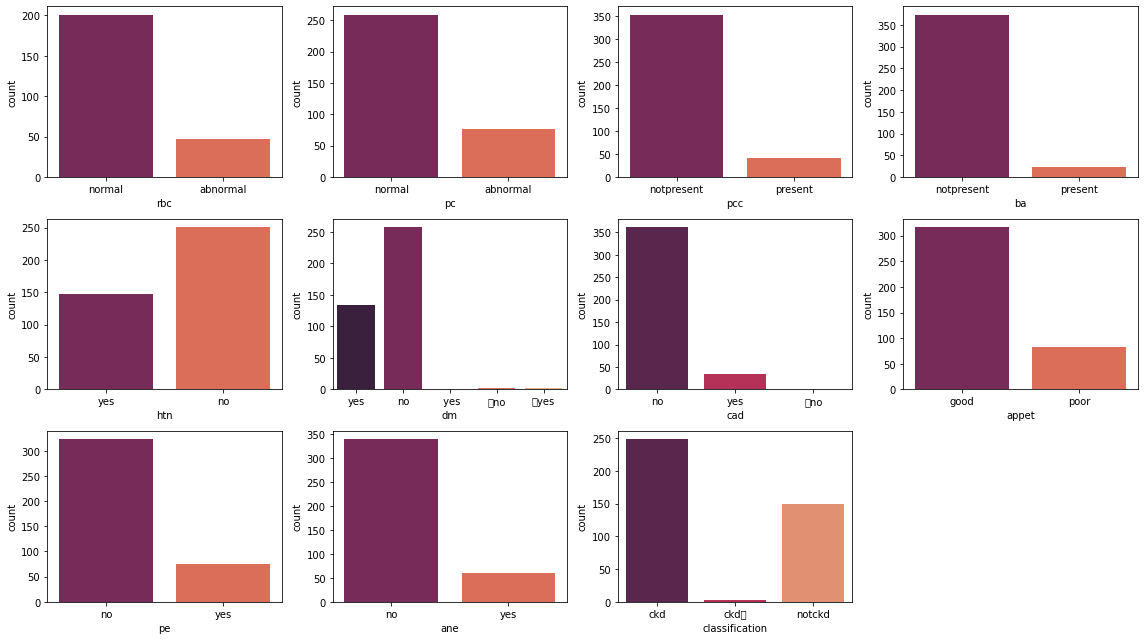

In [10]:
plt.figure(figsize = (16, 9))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()


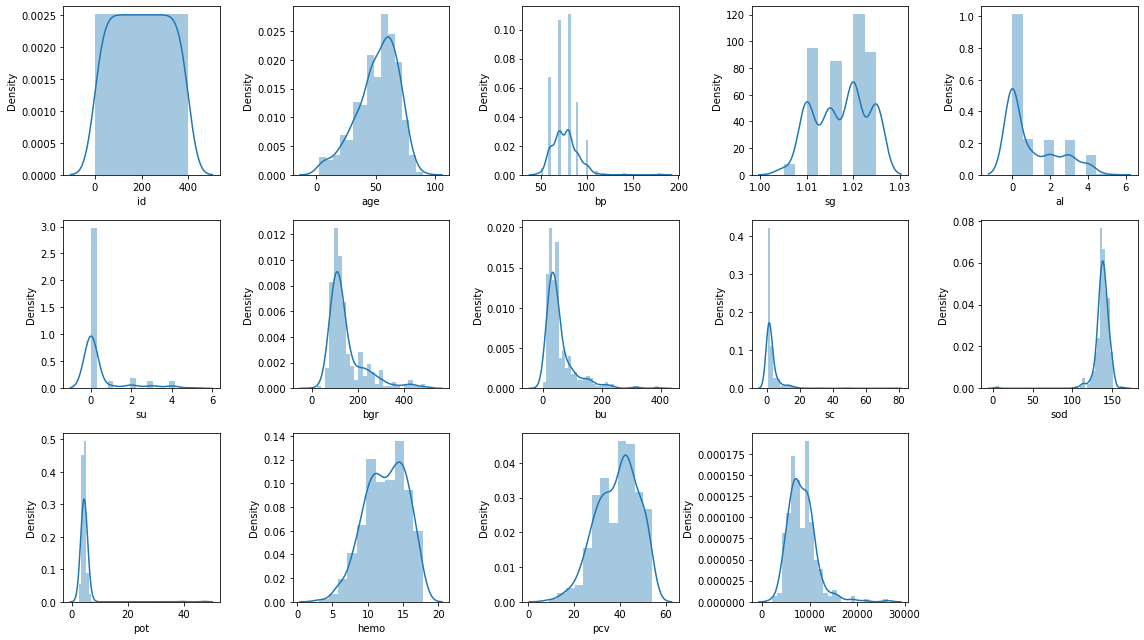

In [11]:
plt.figure(figsize = (16, 9))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [12]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

rbc has [nan 'normal' 'abnormal'] values

pc has ['normal' 'abnormal' nan] values

pcc has ['notpresent' 'present' nan] values

ba has ['notpresent' 'present' nan] values

htn has ['yes' 'no' nan] values

dm has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

cad has ['no' 'yes' '\tno' nan] values

appet has ['good' 'poor' nan] values

pe has ['no' 'yes' nan] values

ane has ['no' 'yes' nan] values

classification has ['ckd' 'ckd\t' 'notckd'] values



In [13]:
df['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['cad'] = df['cad'].replace(to_replace = '\tno', value='no')

df['classification'] = df['classification'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

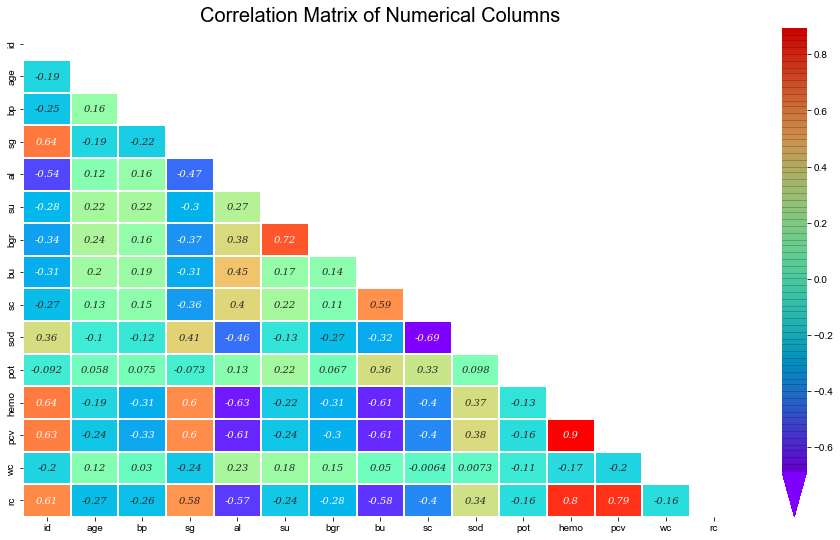

In [14]:
# Define the figure size
plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(df.corr())

# Generate heatmap correlation
ax = sns.heatmap(df.corr(), mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Matrix of Numerical Columns', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)


In [15]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

# Check those cols who has more than 70% correlation
corr_features= correlation(df, 0.7)
corr_features

{'bgr', 'pcv', 'rc'}

In [16]:
df = df.drop(corr_features,axis=1)
df.shape   # 25 - 3 = 22

(400, 23)

In [17]:
# whole dataset
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bu                 19
sc                 17
sod                87
pot                88
hemo               52
wc                106
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [18]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [19]:
# check the missing value in Numerical Col
df[num_cols].isnull().sum()

id        0
age       9
bp       12
sg       47
al       46
su       49
bu       19
sc       17
sod      87
pot      88
hemo     52
wc      106
dtype: int64

In [20]:
df[cat_cols].isnull().sum()

rbc               152
pc                 65
pcc                 4
ba                  4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [21]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [22]:
for col in num_cols:
    random_value_imputation(col)

In [23]:
df[num_cols].isnull().sum().sum()

0

In [24]:
random_value_imputation('rbc')
random_value_imputation('pc')

for col in cat_cols:
    impute_mode(col)

In [25]:
df[cat_cols].isnull().sum().sum()

0

In [26]:
df[cat_cols]

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,not ckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,not ckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,not ckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,not ckd


In [27]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

rbc has 2 categories

pc has 2 categories

pcc has 2 categories

ba has 2 categories

htn has 2 categories

dm has 2 categories

cad has 2 categories

appet has 2 categories

pe has 2 categories

ane has 2 categories

classification has 2 categories



In [28]:
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [29]:
df[cat_cols]

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,1,1,0,0,1,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1,0
3,1,0,1,0,1,0,0,1,1,1,0
4,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0,0,1
396,1,1,0,0,0,0,0,0,0,0,1
397,1,1,0,0,0,0,0,0,0,0,1
398,1,1,0,0,0,0,0,0,0,0,1


In [30]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [31]:
X.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bu,sc,sod,pot,hemo,wc,htn,dm,cad,appet,pe,ane
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,36.0,1.2,137.0,3.9,15.4,7800.0,1,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,18.0,0.8,136.0,4.7,11.3,6000.0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,53.0,1.8,142.0,5.0,9.6,7500.0,0,1,0,1,0,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,56.0,3.8,111.0,2.5,11.2,6700.0,1,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,26.0,1.4,137.0,5.0,11.6,7300.0,0,0,0,0,0,0


In [32]:
Y.unique() # chronic kidney disease either is ckd(0) or notckd (1)

array([0, 1])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [34]:
print("X_train", X_train.shape)
print("Y_train", y_train.shape)

X_train (320, 22)
Y_train (320,)


In [35]:
print("X_test", X_test.shape)
print("X_test", y_test.shape)

X_test (80, 22)
X_test (80,)


In [36]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt_sklearn = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [38]:
dt_sklearn.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

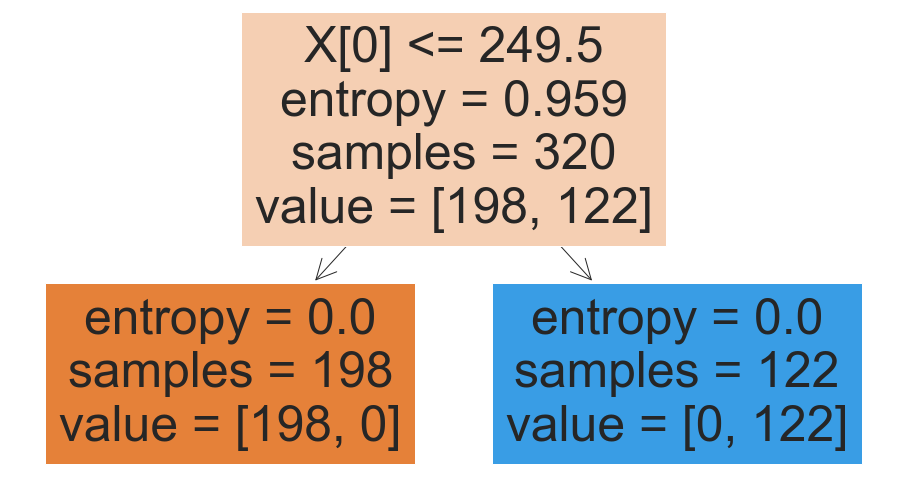

In [39]:
plt.figure(figsize = (16, 9))
plot_tree(dt_sklearn, filled=True)
plt.show()

In [40]:
dt_sklearn_pred_test = dt_sklearn.predict(X_test)
dt_sklearn_pred_train = dt_sklearn.predict(X_train)

In [44]:
Accuracy_train = accuracy_score(dt_sklearn_pred_train, y_train)
Accuracy_test = accuracy_score(dt_sklearn_pred_test, y_test)
print(f"Training Accuracy is {Accuracy_train}")
print(f"Test Accuracy is {Accuracy_test}")

Training Accuracy is 1.0
Test Accuracy is 1.0


In [45]:
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.95892008]),
 'impurities': array([0.        , 0.95892008])}

Text(0, 0.5, 'total impurity of leaves')

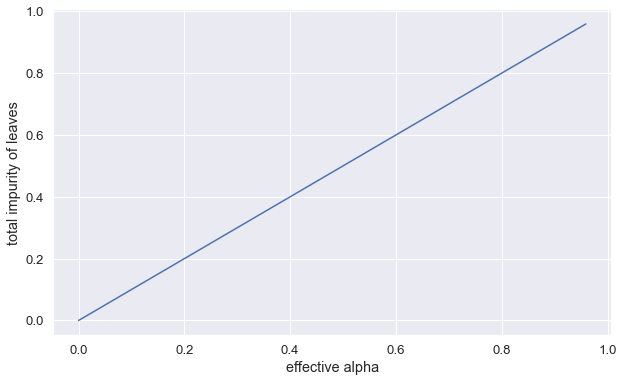

In [46]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [47]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = 'entropy', random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'total depth')

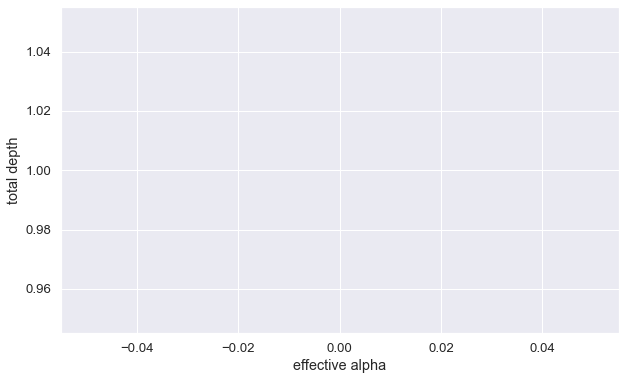

In [56]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

Text(0, 0.5, 'Accuracy scores')

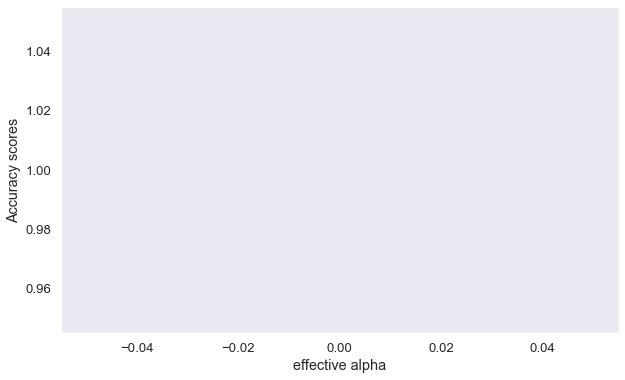

In [49]:
from sklearn.metrics import accuracy_score

acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

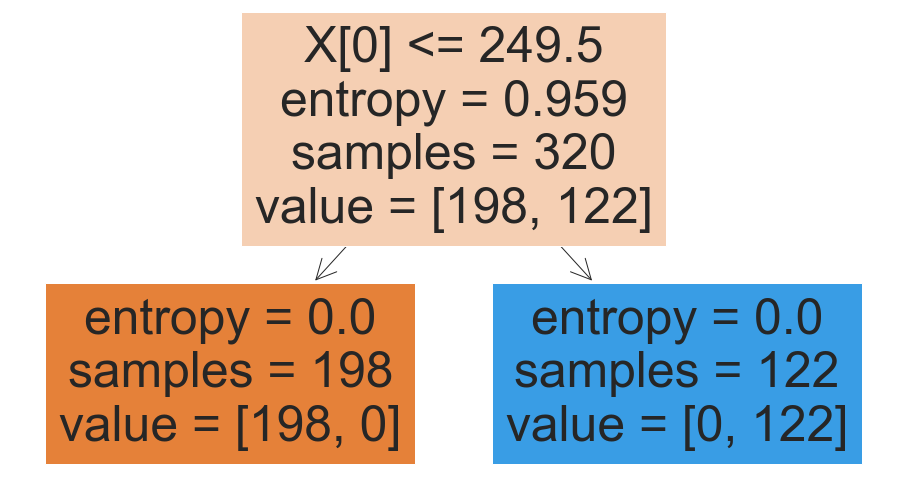

In [50]:
dt_sklearn1 = DecisionTreeClassifier(ccp_alpha= 0.05, criterion = 'entropy', random_state = 0)
dt_sklearn1.fit(X_train, y_train)
plt.figure(figsize = (16, 9))
plot_tree(dt_sklearn1, filled=True)
plt.show()


In [52]:
dt_sklearn_pred_test = dt_sklearn1.predict(X_test)
dt_sklearn_pred_train = dt_sklearn1.predict(X_train)
Accuracy_train = accuracy_score(dt_sklearn_pred_train, y_train)
Accuracy_test = accuracy_score(dt_sklearn_pred_test, y_test)
print(f"Training Accuracy is {Accuracy_train}")
print(f"Test Accuracy is {Accuracy_test}")

Training Accuracy is 1.0
Test Accuracy is 1.0


<AxesSubplot:>

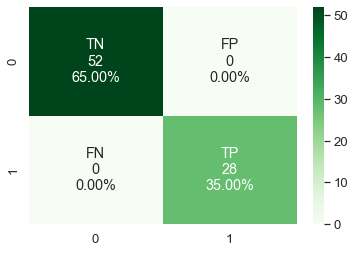

In [53]:
confusion_matrix_ = confusion_matrix(dt_sklearn_pred_test, y_test)

#[row, column]
TP = confusion_matrix_[1, 1]        
TN = confusion_matrix_[0, 0]           
FP = confusion_matrix_[0, 1]           
FN = confusion_matrix_[1, 0]

group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_.flatten()/np.sum(confusion_matrix_)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix_, annot=labels, fmt='', cmap='Greens')

In [54]:
# Accuracy Score
Accuracy = accuracy_score(dt_sklearn_pred_test, y_test)
print('Accuracy Score:', Accuracy) 

# Precision Score
Precision = precision_score(dt_sklearn_pred_test, y_test)
print('Precision Score:', Precision)   

# True positive Rate (TPR) or Sensitivity or Recall
TPR = recall_score(dt_sklearn_pred_test, y_test)
print('True positive Rate:', TPR)             

# False positive Rate (FPR)
FPR = FP / float(TN + FP)
print('False positive Rate', FPR)                       

# F1 Score or F-Measure or F-Score
F1 = f1_score(dt_sklearn_pred_test, y_test)
print('F1 Score:', F1)                 

# Specificity
Specificity = TN / (TN + FP)
print('Specificity:', Specificity )                    

# Mean Absolute Error
Error = mean_absolute_error(dt_sklearn_pred_test, y_test)
print('Mean Absolute Error:', Error)   

# ROC Area
Roc = roc_auc_score(dt_sklearn_pred_test, y_test)
print('ROC Area:', Roc) 

Accuracy Score: 1.0
Precision Score: 1.0
True positive Rate: 1.0
False positive Rate 0.0
F1 Score: 1.0
Specificity: 1.0
Mean Absolute Error: 0.0
ROC Area: 1.0


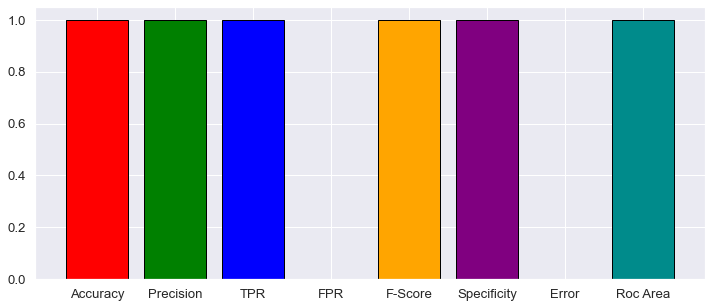

In [55]:
plt.figure(figsize = (12, 5))

result = [Accuracy, Precision, TPR, FPR, F1, Specificity, Error, Roc]
label = ["Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error", "Roc Area"]
colors=[ 'red', 'green', 'blue', 'darkgoldenrod', 'orange', 'purple', 'brown', 'darkcyan']

plt.bar(label, result, color = colors, edgecolor='black')
plt.show()